 Fs=1000 hz
 Ts=0.001 s
[ 0.001434   -0.00814773 -0.00495382 ... -0.02092338 -0.00495382
  0.02059747]
240


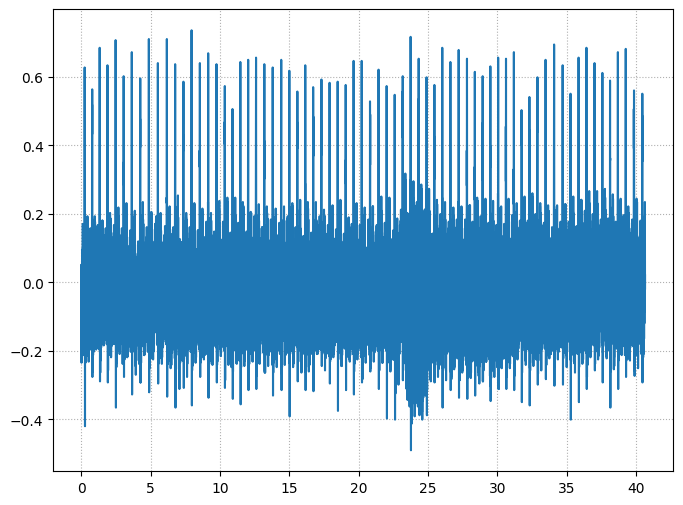

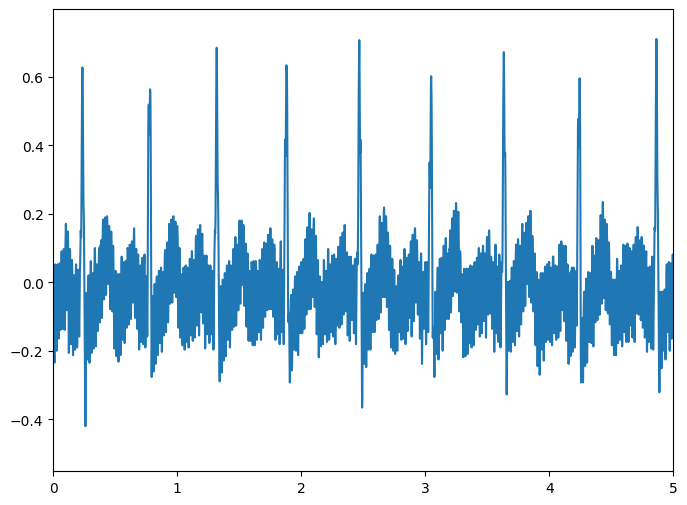

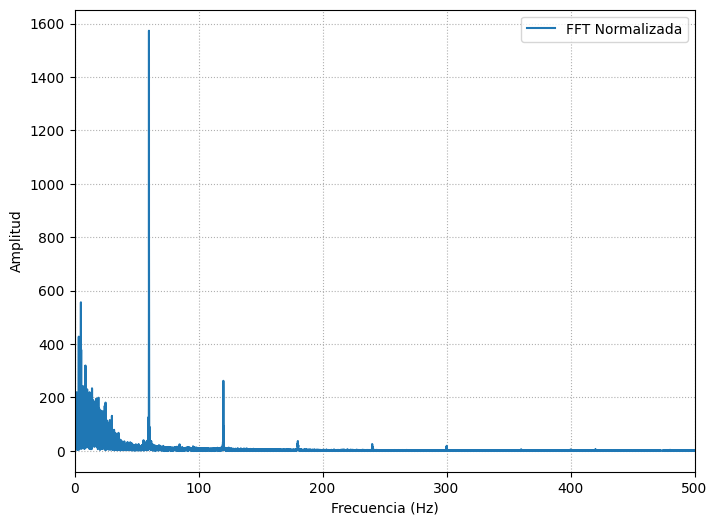

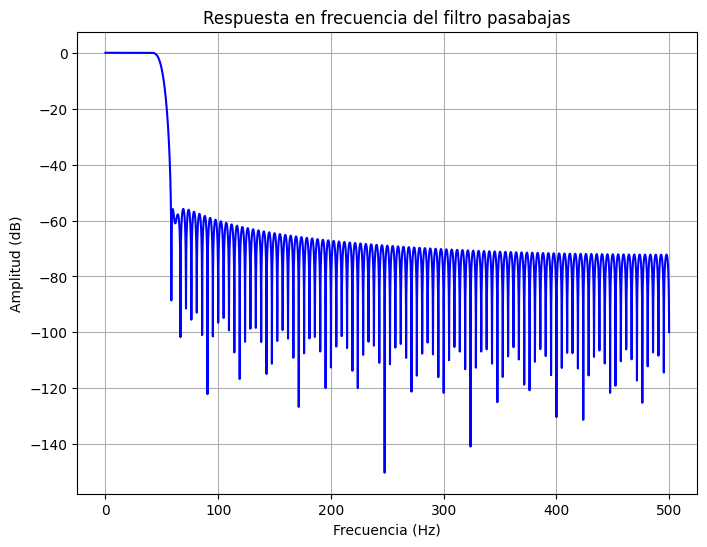

(0.0, 5.0)

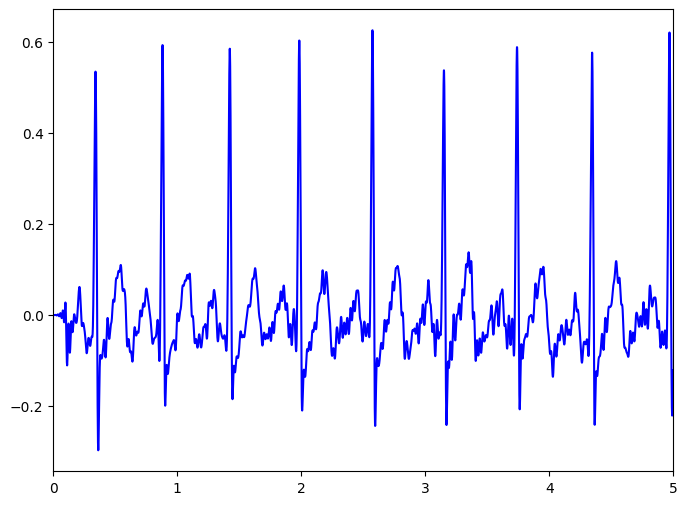

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import firwin, lfilter
from tqdm import tqdm
from scipy.signal import firwin, freqz

f = open("ecg2reposo.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./ecg2reposo.txt", delimiter="\t",skip_header = 3)
yarray = a[:, 5]
N=len(yarray)
bits = 10 # Bits de la salida
volt_range = 3.3
yarray = (yarray/2**bits -1/2) * volt_range/1009
yarray=yarray*1000 # convertir los bits a mV
yarray = yarray - np.mean(yarray)
xarray = np.arange(1, len(yarray)+1)/Fs
print(yarray)
xarray=xarray
plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.grid(linestyle=":")
plt.figure(figsize=(8, 6))
plt.plot(xarray, yarray, label="señal")
plt.xlim(0,5)

#transformada de fourier FFT
signal_fft = np.fft.fft(yarray)
frequencies = np.fft.fftfreq(N, Ts)
frequencies = np.fft.fftshift(frequencies)
signal_fft = np.fft.fftshift(signal_fft)
plt.figure(figsize=(8, 6))
plt.plot(frequencies, np.abs(signal_fft), label="FFT Normalizada")
plt.grid(linestyle=":")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend(loc="upper right")
plt.xlim(0, Fs/2)

wp = 40
ws = 60
wc=(wp + ws) /2

dw= ws-wp

lowpass_filter= firwin(numtaps=210, cutoff=wc,  window='hamming',fs=Fs)

# Definir el orden del filtro
M =  int(np.floor(12 / dw))
print(M)

w, h_freqz = freqz(lowpass_filter, 1, worN=8000)
frequencies = w * Fs / (2 * np.pi)
plt.figure(figsize=(8, 6))
plt.plot(frequencies, 20 * np.log10(abs(h_freqz)), 'b')
plt.title('Respuesta en frecuencia del filtro pasabajas')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud (dB)')
plt.grid()
plt.show()

filtered_signal = lfilter(lowpass_filter, 1, yarray)
plt.figure(figsize=(8, 6))
plt.plot(xarray, filtered_signal, 'b')
plt.xlim(0,5)